In [1]:
import matplotlib.pyplot as plt
import numpy as np

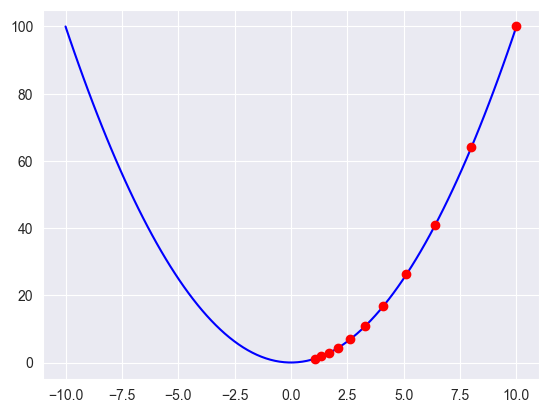

In [2]:
def func(x):
    return x ** 2


def func_deriv(x):
    return 2 * x


z = np.linspace(-10, 10, 100)
plt.plot(z, func(z), color="blue")

# init_values
x = 10
memory = np.array([x])
for _ in range(10):
    x -= 0.1 * func_deriv(x)
    memory = np.append(memory, x)

plt.plot(memory, func(memory), 'ro')

k = -0.4748057649543999, b = -0.012045059719652163, error = 0.05598447993920334


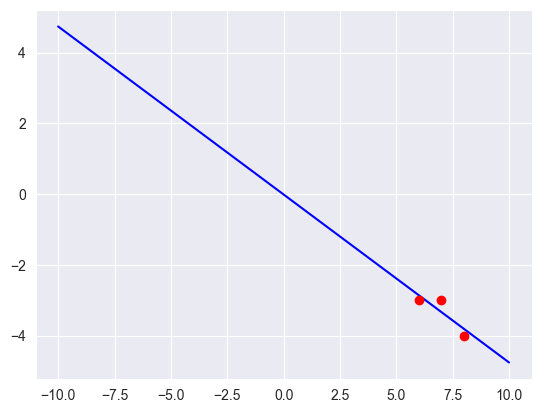

In [38]:
X = np.random.randint(-10, 10, 3)
Y = np.random.randint(-5, 5, 3)

k = 0
b = 0

alpha = 0.01  # скорость спуска по градиенту
epochs = 1000  # Количество интерпций прохождения по всем данным т.е. сколько раз модель "увидит" данные, спрогнозирует и исправит свои параметры в соответсвии с ошибкой
error = 0  # значение MSE

n = float(len(X))  # Число элементов в выборке

# F = (y_pred - y)^2 / N, где y_pred = k * x + b, те F = (k * x + b - y)^2 / N - MSE

# Выполняем шаги градиентного спуска
for i in range(epochs):
    Y_pred = k * X + b  # Текущее предсказание вектора Y
    D_k = (2 / n) * sum(X * (Y_pred - Y))  # Производная функции потерь по w1
    D_b = (2 / n) * sum(Y_pred - Y)  # Производная функции потерь по w0
    k = k - alpha * D_k  # Обновляем w1 по направлению минус градиента
    b = b - alpha * D_b  # Обновляем w0 по направлению минус градиента

    error = sum((Y_pred - Y) ** 2) / n

print(f'k = {k}, b = {b}, error = {error}')

x = np.linspace(-10, 10, 100)
plt.plot(x, k * x + b, color="blue")
plt.plot(X, Y, 'or')